<a href="https://colab.research.google.com/github/mgnarag/binarization-lowres/blob/main/From_Arki_model4a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!ls drive/My\ Drive
file_path = "/content/drive/My Drive/Architectural_designs/From Arki/"

In [ ]:

import time
import pandas as pd


import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf


from PIL import Image, ImageOps
import os
import numpy as np

epoch = 100
model_number = 41
size = 64

def crop(im):
    width, height = im.size
    data = []

    for j in np.arange(0,int(height/size)+1,0.5):
        for i in np.arange(0,int(width/size)+1,0.5):
            im1 = im.crop((0 + (size*i), 0 + (size*j), size + (size*i), size + (size*j)))
            im1 = np.array(im1)
            im1 = im1.astype(np.float32)
            im1 = im1/255
            data.append(im1)
    return data




train_input = np.array(crop(ImageOps.grayscale(Image.open(file_path + "Rizal_input_train.png"))))
print("Done reading the  training input of size = ", train_input.shape)

train_output = np.array(crop(ImageOps.grayscale(Image.open(file_path + "Rizal_output_train.png"))))
print("Done reading the  training out of size = ", train_output.shape)

test_input = np.array(crop(ImageOps.grayscale(Image.open(file_path + "Rizal_input_test.png"))))
print("Done reading the  test input of size = ", test_input.shape)

test_output = np.array(crop(ImageOps.grayscale(Image.open(file_path + "Rizal_output_test.png"))))
print("Done reading the  test output of size = ", test_output.shape)

Done reading the  training input of size =  (16564, 64, 64)
Done reading the  training out of size =  (16564, 64, 64)
Done reading the  test input of size =  (7128, 64, 64)
Done reading the  test output of size =  (7128, 64, 64)


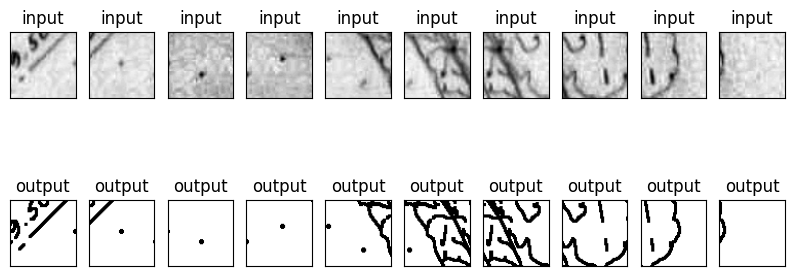

In [ ]:

n = 10
plt.figure(figsize=(10, 4))
for i in range(0,10):

    ax = plt.subplot(2, n, i + 1)
    plt.title("input")
    plt.imshow((train_input[i+3500]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    bx = plt.subplot(2, n, i + n + 1)
    plt.title("output")
    plt.imshow((train_output[i+3500]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()



In [ ]:
start = time.time()
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

class autoenc(Model):
  def __init__(self):
    super(autoenc, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Input(shape=(size, size, 1)),
      layers.Conv2D(64, (3, 3), activation='relu', padding='same', strides=1)])

    self.decoder = tf.keras.Sequential([
      layers.Conv2DTranspose(64, kernel_size=3, strides=1, activation='relu', padding='same'),
      layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = autoenc()


autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

model = autoencoder.fit(train_input, train_output,
                epochs=epoch,
                shuffle=True,
                validation_data=(test_input, test_output))

autoencoder.encoder.summary()


autoencoder.save(file_path + '1 Models/' + 'autoencoder_' + str(model_number))

loss = model.history['loss']
loss = pd.DataFrame(loss)
loss.to_csv(file_path + '2 Loss/'+'loss_'+ str(model_number) + '.csv')
val_loss = model.history['val_loss']
val_loss = pd.DataFrame(val_loss)
val_loss.to_csv(file_path + '3 Validation loss/' +'val_loss_'+ str(model_number) + '.csv')

# record end time
end = time.time()

print("The time of execution of above program is :",
      (end-start), "seconds")


Epoch 1/100
518/518 [==============================] - 18s 16ms/step - loss: 0.0306 - val_loss: 0.0273
Epoch 2/100
518/518 [==============================] - 7s 14ms/step - loss: 0.0209 - val_loss: 0.0200
Epoch 3/100
518/518 [==============================] - 7s 14ms/step - loss: 0.0197 - val_loss: 0.0198
Epoch 4/100
518/518 [==============================] - 7s 14ms/step - loss: 0.0189 - val_loss: 0.0195
Epoch 5/100
518/518 [==============================] - 7s 14ms/step - loss: 0.0185 - val_loss: 0.0189
Epoch 6/100
518/518 [==============================] - 8s 16ms/step - loss: 0.0181 - val_loss: 0.0187
Epoch 7/100
518/518 [==============================] - 7s 14ms/step - loss: 0.0179 - val_loss: 0.0185
Epoch 8/100
518/518 [==============================] - 8s 15ms/step - loss: 0.0177 - val_loss: 0.0183
Epoch 9/100
518/518 [==============================] - 7s 14ms/step - loss: 0.0177 - val_loss: 0.0182
Epoch 10/100
518/518 [==============================] - 8s 15ms/step - loss: 0.01

KeyboardInterrupt: ignored